# 3/21
1. Find entropy in order to characterize attributes by most informative
2. Experiment with uniqueness

## Finding Most Informative Metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})
plt.rc('legend', fontsize=12) 
from scipy.special import rel_entr
from math import isinf

In [2]:
################## DATA FRAME ##################
datafile = 'Data/Fitbit_Kaggle/dailyActivity_merged.csv'
fields = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
all_IDs = df.Id.unique()
num_users = int(len(all_IDs))
my_cols = df.columns[2:]

In [4]:
my_hist_bins = [0] * len(my_cols)
for i in range(len(my_hist_bins)):
    my_hist_bins[i] = [0] * num_users

for i in range(len(my_cols)):
    for j, user in enumerate(all_IDs):
        temp_df = df.loc[df['Id'] == user]
        edited_df = temp_df[temp_df[my_cols[i]] !=0]

        my_series = edited_df[my_cols[i]]
        count, division = np.histogram(my_series)
        my_hist_bins[i][j] = count/sum(count)
        #caloric_series.hist(bins=division)

C:\Users\kdmen\miniconda3\envs\nscenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":


In [5]:
distance_matrix = np.zeros((len(my_cols), num_users, num_users))
dms = distance_matrix.shape
avg_dist_lst = np.zeros((1, dms[0]))

for z in range(len(my_cols)):
    for i in range(num_users-1):
        for j in range(num_users-1):
            distance_matrix[z, i, j] = sum(rel_entr(np.array(my_hist_bins[z][i]),np.array(my_hist_bins[z][j])))
            if np.isinf(distance_matrix[z, i, j]):
                distance_matrix[z, i, j] = 0
            if np.isnan(distance_matrix[z, i, j]):
                distance_matrix[z, i, j] = 0
    avg_dist_lst[0, z] = np.average(distance_matrix[z])

In [6]:
avg_dist_dict = dict(zip(my_cols, avg_dist_lst[0]))
print(avg_dist_dict.items())

dict_items([('TotalSteps', 0.1755775164428969), ('TotalDistance', 0.19994318296652075), ('TrackerDistance', 0.19918965580706682), ('VeryActiveDistance', 0.2731360403195777), ('ModeratelyActiveDistance', 0.23293366398305493), ('LightActiveDistance', 0.24231369567314384), ('SedentaryActiveDistance', 0.010114049684333635), ('VeryActiveMinutes', 0.2890269858030327), ('FairlyActiveMinutes', 0.26617139384740085), ('LightlyActiveMinutes', 0.14467511493040616), ('SedentaryMinutes', 0.13966970827351677), ('Calories', 0.21871800803684954)])


C:\Users\kdmen\miniconda3\envs\nscenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


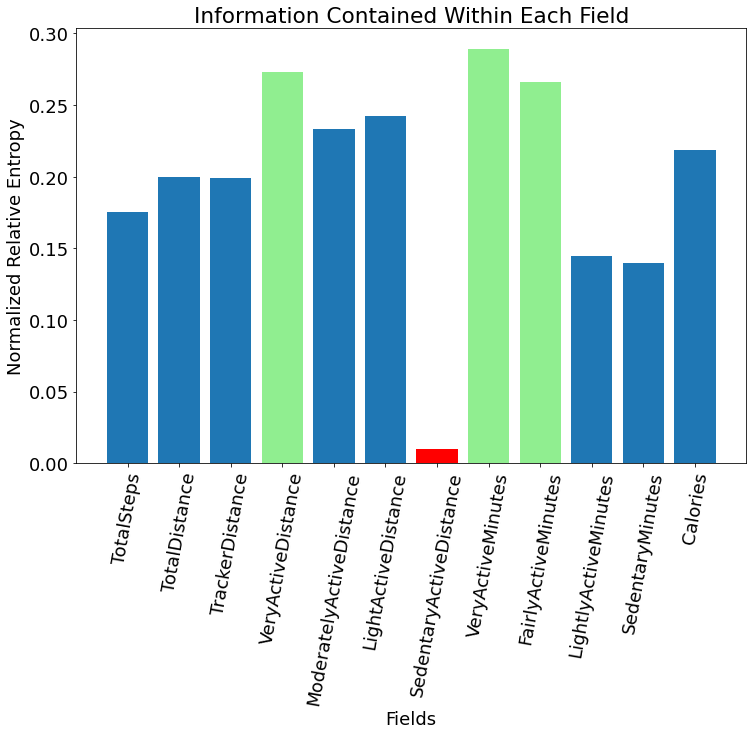

In [7]:
my_keys = avg_dist_dict.keys()
my_values = avg_dist_dict.values()
my_select_keys = ["FairlyActiveMinutes", "VeryActiveMinutes", "VeryActiveDistance"]
my_select_values = [0.2662, 0.2891, 0.2732]

plt.figure(figsize=(12,8))
labels = my_keys
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=80)
plt.bar(my_keys, my_values)
plt.bar(my_select_keys, my_select_values, color="lightgreen")
plt.bar("SedentaryActiveDistance", 0.01012, color="red")
plt.title('Information Contained Within Each Field')
plt.ylabel('Normalized Relative Entropy')
plt.xlabel('Fields')
plt.show()

In [8]:
dist_std = np.std(distance_matrix)
print(dist_std)
print(dist_std*3)

0.44989156438357863
1.349674693150736


In [9]:
np.average(np.array(avg_dist_lst))

0.19928908464731668

> **Conclusion:** As can be seen above, the highest values are 0.289, 0.273, and 0.266, for the following fields, respectively: 'FairlyActiveMinutes', 'VeryActiveDistance', and 'LightlyActiveMinutes'.  Calories and total steps were both relatively uninformative.